<div style="background-color: #6C5294; color: white; padding: 20px; border-radius: 10px; margin-bottom: 20px;">
  <h2 style="margin-top:0px; color:white;">🎯 Med-Gemma Impact Challenge Submission</h2>
  <p style="margin-bottom:0px; font-size:14px;"><b>Author:</b> MedGemma Forensic By SM Jahid | <b>Model:</b> Google Gemma 3 1B, Medsiglip, Medasr (Edge-Optimized)</p>
</div>

# <span style='color:#2E7D32'>MedGemma Forensic:</span> The Autonomous Pathologist for the Missing Billion

> ***"In the 'Last Mile' of healthcare — conflict zones, remote villages, and disaster sites — the internet is a luxury that doctors cannot afford. Disease moves faster than data."***

**MedGemma Forensic** is a **Self-Contained Artificial Intelligence System** engineered for zero-connectivity environments. By moving intelligence from the Cloud to the Edge, I empower frontline health workers, doctors to
detect invisible outbreaks **before they become pandemics**.

---


### 🔗 Official Submission Links
*   **🎥 [Watch the 1-Minute Overview Here](https://www.youtube.com/watch?v=70MFbYzqVho)**
*   **🎥 [Watch the 2-Minute Worker Node Here](https://www.youtube.com/watch?v=qNRboKAnfrs)**
*   **🎥 [Watch the 3-Minute Mesh Network AI Pipeline Here](https://www.youtube.com/watch?v=GGymf9JfSEI)**
*   **🕹️ [Try the Live Gradio Web Demo](https://huggingface.co/spaces/smfaisal/medgemma-forensic)**
*   **💻 [Android & Edge Core Architecture Source Code (GitHub)](https://github.com/smjahid012/medgemma-forensic)**

---
## 📋 Table of Contents
1. [🚀 The Engineering Breakthrough: "The Impossible Stack"](#sec-1)
    * [🕵️ Profiling the Impossible: Native Allocation Trace](#sec-1-5)
2. [🏗️ Architecture Deep Dive: The \'Sequential AI Kernel\'](#sec-2)
3. [🔗 The \'Rosetta Stone\': Bridging Computer Vision to Epidemiology](#sec-3)
4. [🔬 The Clinical Trust Hierarchy: When Voice Overrides Vision](#sec-4)
5. [📉 The \'Pattern Hunter\' Engine — Full Implementation](#sec-5)
6. [🧪 Simulation: Generating \'Last Mile\' Data](#sec-6)
7. [🕵️ Forensic Analysis: Real-Time Detection Pipeline](#sec-7)
8. [📱 PROOF OF EXECUTION: Real Device Log Evidence](#sec-8)
9. [🗺️ Geographic Cluster Map — Real GPS Coordinates](#sec-9)
10. [📋 Verbatim Gemma 3 1B Forensic Report](#sec-10)
11. [🎯 Conclusion: Why MedGemma FORENSIC?](#sec-11)

---



## 🚀 The Engineering Breakthrough: "The Impossible Stack"

Running a Multimodal Diagnostic Suite (LLM + Vision + Audio + Anomaly Detection) on a consumer Android device was considered impossible due to memory constraints. **I solved the 'Memory Paradox.'**

My architecture orchestrates **4.3GB of Quantized AI Models** on devices with limited RAM using a custom-built **Sequential Lifecycle Manager ('The Traffic Cop')** — a Kotlin `ModelLifecycleManager` that enforces a **Single-Model-Residency** policy, swapping gigabytes of weights without triggering Android's OOM Killer.

### The Offline AI Stack:
| Component | Model | Role |
|-----------|-------|------|
| 🧠 **The Brain** | `Gemma 3 1B` (LiteRT Quantized, ~1GB) | Clinical Reasoning & Report Synthesis |
| 👁️ **The Eye** | `MedSigLIP 448px` (Custom TFLite Split, ~1.9GB total) | Dermatological Forensics |
| 👂 **The Ear** | `MedASR` (Sherpa ONNX INT8, ~150MB) | Verbal Autopsy Transcription |
| 📉 **The Memory** | `Probabilistic Anomaly Engine` (On-device) | Spatiotemporal Outbreak Detection |
| 🕸️ **The Nervous System** | `P2P Mesh Network` (Google Nearby Connections) | Serverless, Zero-Internet Data Sync |

> **Note on MedGemma 4B:** I have the `MedGemma 1.5 4B` model but deliberately use Gemma 3 1B for v1. A 4B *Decoder* LLM has dynamic KV Cache memory that spikes unpredictably during chain-of-thought reasoning, triggering Android's Low Memory Killer on 4GB devices. MedSigLIP is an *Encoder* — fixed, predictable memory. I ship what is stable. MedGemma 4B is my v2 target.\n

<a id="sec-1-5"></a>
### 🕵️ Profiling the Impossible: Native Allocation Trace
To definitively prove my **"Traffic Cop" Sequential Lifecycle Manager** works on constrained EDGE devices, I ran a bare-metal `heapprofd` Android Studio trace.

<img src="https://raw.githubusercontent.com/smjahid012/medgemma-forensic/refs/heads/main/medgemma-ram-test/native-test-visual.png" width="800" alt="Native Allocation Trace"/>


**The 5.85 GB Lifetime Allocation Paradox:**
During a complete medical inference cycle (Vision → Audio → LLM), the system requested a cumulative total of **5.85 GB** of native memory layout. On a 4GB physical device, loading this simultaneously triggers an immediate Android Out-Of-Memory (OOM) termination.

**How I Survived (The 417 MB Reality):**
Because my pipeline strictly enforces sequential model residency, older models are aggressively garbage-collected from the native heap before the next sequence initializes.

| Profiler Metric | Result | Engineering Significance |
|---|---|---|
| **Cumulative Allocation** | 5.85 GB | Combined footprint of all 3 uncompressed AI models |
| **Peak Live Native Heap** | **~417 MB** | Maximum physical RAM occupied concurrently |
| **Deallocation Rate** | ~85% | Proof of perfect sequential RAM reclamation |
| **4GB Device Verdict** | **Safe** | Comfortably executes entirely inside standard OS user-space limits. |

---


---
## 1. 🏗️ Architecture Deep Dive: The 'Sequential AI Kernel'

### Phase 1: Visual Forensics
- I load the **official Google MedSigLIP 448** model — surgically split into two TFLite files for serial RAM loading:
  - `medsiglip_vision_448.tflite` (~1.5GB): Image → 1152-dim embedding
  - `medsiglip_text_448-update.tflite` (~1.7GB): Label prompts → 1152-dim embeddings
- **The LOGIT_SCALE Fix:** Standard TFLite SigLIP conversion kills softmax discrimination (scores collapse to ~0.5). I reverse-engineered the attention layer and apply `LOGIT_SCALE = 100.0f` in Kotlin after the dot product, restoring sensitivity to detect subtle signs like *'necrotic eschar'* vs *'diabetic ulcer'*.
- **L2 Normalization** is applied to both embeddings before comparison — matching the original SigLIP paper exactly.

### Phase 2: Verbal Autopsy
- Vision models are purged from RAM. **MedASR** (Sherpa ONNX) is loaded.
- I implemented a **Raw MediaCodec Pipeline** that decodes M4A/MP3/WAV → 16kHz PCM FloatArrays, bypassing Android's flaky `AudioRecord` API for long-form medical dictation.

### Phase 3: Clinical Synthesis
- ASR models purged. **Gemma 3 1B** (LiteRT) is loaded.
- The LLM acts as a **Judge** — synthesizing Visual Evidence + Verbal History → structured `ForensicReport`.
- Total Peak RAM Usage: Never exceeds the largest single model. A **4GB pipeline runs on a 3GB device**.

### Phase 4: Epidemiological Intelligence (The Mesh)
- The structured report is packaged as a `CaseFile.proto` (~50KB) and broadcast via **Google Nearby Connections** (WiFi Direct / Bluetooth).
- **Worker Node** (< 7.1 GB RAM — *auto-detected at launch*): Sensor-only. Captures image + audio, transcribes via MedASR, sends payload to Anchor. Receives only the verdict — `OUTBREAK_CONFIRMED` or `NO_OUTBREAK` — via push notification. No full report stored locally *(data minimisation by design)*.
- **Anchor Node** (≥ 7.1 GB RAM — *auto-detected at launch*): The primary intelligence hub. Receives evidence from up to 50+ Workers, runs the full AI pipeline (Eye → Ear → Brain), executes the Anomaly Engine, generates and stores the complete forensic dossier.
- **Fallback:** If no Anchor is in range, data saves locally. A 'Send' button appears when an Anchor is detected.
### 🤖 Auto Role Assignment — Zero Configuration
```kotlin
// InvestigationScreen.kt — lines 279-285
val isAnchorCapableDevice = remember {
    val memInfo = ActivityManager.MemoryInfo()
    activityManager.getMemoryInfo(memInfo)
    val totalRamGb = memInfo.totalMem / (1024.0 * 1024.0 * 1024.0)
    totalRamGb >= 7.1   // true → Anchor UI;  false → Worker UI
}
```
The app reads physical RAM at launch. ≥ 7.1 GB → **Anchor** buttons appear (Start Anchor, full AI pipeline auto-triggers on receipt). < 7.1 GB → **Worker** buttons appear (Search Anchor, Send to Anchor). A field nurse picks up any phone and it automatically knows its role — no IT configuration required.
\n

---
## 2. 🔗 The 'Rosetta Stone': Bridging Computer Vision to Epidemiology

A raw AI model sees pixels (e.g., `"crusted ulcer"`). A public health official needs patterns (e.g., `"Skin_Lesions"`). I built a **Forensic Semantic Bridge** (`DiseaseToSymptomMapper.kt`) that translates **25 focused, CPU-optimised labels** into a standardized **25-dimensional epidemiological vector**.\n

In [1]:
# ── Setup: Verify all dependencies (all pre-installed in Colab/Kaggle) ──
import sys
required = ['numpy', 'pandas', 'matplotlib', 'seaborn']
for pkg in required:
    try:
        __import__(pkg)
        print(f'  ✅ {pkg}')
    except ImportError:
        import subprocess
        subprocess.run([sys.executable, '-m', 'pip', 'install', pkg, '-q'])
        print(f'  📦 {pkg} installed')
print('\n✅ All core dependencies ready.')


  ✅ numpy
  ✅ pandas
  ✅ matplotlib
  ✅ seaborn

✅ All core dependencies ready.


In [2]:
# DEMO: The 'Rosetta Stone' Logic (Mirrors Kotlin DiseaseToSymptomMapper.kt)

def forensic_semantic_bridge(visual_finding, confidence):
    """Translates AI visual findings into WHO-standard epidemiological signals."""
    mapping_registry = {
        # High-Risk Forensics (Anthrax, Plague, Necrotizing Fasciitis)
        "necrotic skin lesion": ["Skin_Necrosis", "Skin_Lesions"],
        "eschar":               ["Skin_Necrosis", "Unusual_Lesion_Color"],
        "gangrenous tissue":    ["Skin_Necrosis", "Skin_Lesions", "Fever"],
        # Infection Signatures
        "purulent skin infection": ["Skin_Lesions", "Fever", "Unusual_Lesion_Color"],
        "abscess":                 ["Skin_Lesions"],
        # Viral Signatures (Mpox, Chickenpox, Dengue)
        "vesicular rash":   ["Skin_Lesions", "Rash_Petechiae", "Fever"],
        "crusted ulcer":    ["Skin_Lesions", "Unusual_Lesion_Color"],
        "petechial rash":   ["Rash_Petechiae", "Bleeding_Gums"],
        # Hemorrhagic Fever Signatures (Ebola/Marburg)
        "bleeding gums":    ["Bleeding_Gums", "Fever"],
        "jaundiced sclera": ["Jaundice", "Fever"],
    }
    signals = mapping_registry.get(visual_finding, ["Skin_Lesions"])
    return signals

field_cases = [
    {"image_ai_says": "eschar",        "conf": 0.92, "location": "Village_A, Dhaka Div."},
    {"image_ai_says": "vesicular rash", "conf": 0.88, "location": "Village_B, Dhaka Div."},
    {"image_ai_says": "petechial rash", "conf": 0.79, "location": "Village_A, Dhaka Div."},
]

print("=== FORENSIC SEMANTIC BRIDGE: Visual AI → Epidemiological Signals ===")
for case in field_cases:
    signals = forensic_semantic_bridge(case['image_ai_says'], case['conf'])
    print(f"\n📸 AI Vision [{case['location']}]: '{case['image_ai_says']}' (conf={case['conf']})")
    print(f"   └── 🏥 Public Health Signals: {signals}")

=== FORENSIC SEMANTIC BRIDGE: Visual AI → Epidemiological Signals ===

📸 AI Vision [Village_A, Dhaka Div.]: 'eschar' (conf=0.92)
   └── 🏥 Public Health Signals: ['Skin_Necrosis', 'Unusual_Lesion_Color']

📸 AI Vision [Village_B, Dhaka Div.]: 'vesicular rash' (conf=0.88)
   └── 🏥 Public Health Signals: ['Skin_Lesions', 'Rash_Petechiae', 'Fever']

📸 AI Vision [Village_A, Dhaka Div.]: 'petechial rash' (conf=0.79)
   └── 🏥 Public Health Signals: ['Rash_Petechiae', 'Bleeding_Gums']


---
## 2.5 🔬 The Clinical Trust Hierarchy: When Voice Overrides Vision

One of my most important medical AI design decisions: **not all modalities are equal.**

A camera photo taken at night in a remote village may be blurry, poorly lit, or at the wrong angle. The vision model might return `"skin ulcer: 61%"`. But if the field worker *says* the word `"gangrene"` — they have **seen it with human eyes**. Their verbal confirmation is more reliable than a blurry photo.

I built a **4-Layer Clinical Trust Hierarchy** that encodes this medical reasoning directly into the Android pipeline:

```
Layer 1 → MedSigLIP Vision     (Necrosis listed as label #1 — highest LOGIT_SCALE priority)
Layer 2 → Voice/Manual Override (Worker says 'gangrene' → confidence forced to 0.95)
Layer 3 → Rosetta Stone Bridge  (12 necrosis variants → Skin_Necrosis epidemiological signal)
Layer 4 → AnomalyEngine Boost   (Skin_Necrosis → +0.15 severity → near-certain anomaly flag)
```

> **Why Necrosis specifically?** In Anthrax, Necrotizing Fasciitis, and late-stage Gangrene, tissue death is visible hours before systemic collapse. Every hour of delay costs a limb or a life. The system is designed to **refuse to under-react** to necrosis — regardless of photo quality.

> **Human-in-the-loop design:** A DeepMind principle — when stakes are life-or-death, human confirmation must be able to override AI uncertainty. My implementation is a direct application of this.\n

In [3]:
# DEMO: Clinical Trust Hierarchy — Skin Necrosis Override
# Mirrors InvestigationScreen.kt (lines 3091-3109) + DiseaseToSymptomMapper.kt + AnomalyEngine.kt

def clinical_trust_hierarchy(vision_label, vision_confidence, verbal_transcription, user_selected_symptoms):
    """
    Multi-modal fusion with medical priority hierarchy.
    Voice/manual confirmation OVERRIDES vision model for critical necrotic symptoms.
    """
    necrosis_keywords = ["necrosis", "necrotic", "gangrene", "gangrenous", "eschar"]

    verbal_confirms = any(kw in verbal_transcription.lower() for kw in necrosis_keywords)
    manual_confirms = any(
        any(kw in sym.lower() for kw in necrosis_keywords)
        for sym in user_selected_symptoms
    )

    final_label      = vision_label
    final_confidence = vision_confidence
    override         = False

    # LAYER 2: Human confirmation overrides AI uncertainty
    if verbal_confirms or manual_confirms:
        final_label      = "skin necrosis"
        final_confidence = 0.95  # Clinician confirmed — high confidence enforced
        override         = True

    # LAYER 3: Rosetta Stone — disease label → WHO epidemiological signals
    signal_map = {
        "skin necrosis":        ["Skin_Necrosis", "Skin_Lesions"],
        "gangrene":             ["Skin_Necrosis", "Skin_Lesions", "Unusual_Lesion_Color"],
        "eschar":               ["Skin_Necrosis", "Unusual_Lesion_Color"],
        "necrotizing infection": ["Skin_Necrosis", "Skin_Lesions", "Fever"],
        "skin ulcer":           ["Skin_Lesions"],
        "normal skin":          [],
    }
    epi_signals = signal_map.get(final_label, ["Skin_Lesions"])

    # LAYER 4: AnomalyEngine severity boost for hemorrhagic/necrotic symptoms
    severe = ["Skin_Necrosis", "Bleeding_Gums", "Rash_Petechiae", "Seizures"]
    severity_boost = sum(0.15 for s in epi_signals if s in severe)

    return {
        "final_label":         final_label,
        "final_confidence":    final_confidence,
        "override_triggered":  override,
        "epi_signals":         epi_signals,
        "severity_boost":      severity_boost
    }


# Three real-world field scenarios
scenarios = [
    {
        "name": "Night photo, poor lighting — AI uncertain",
        "vision_label": "skin ulcer", "vision_confidence": 0.61,
        "verbal": "patient has gangrene on the foot", "selected": []
    },
    {
        "name": "Clear daytime photo — AI confident, no verbal input",
        "vision_label": "skin necrosis", "vision_confidence": 0.89,
        "verbal": "", "selected": []
    },
    {
        "name": "No photo — worker manually selected 'eschar' in symptom UI",
        "vision_label": "normal skin", "vision_confidence": 0.50,
        "verbal": "", "selected": ["eschar", "high fever"]
    },
]

print("=" * 68)
print("  CLINICAL TRUST HIERARCHY — Multi-Modal Necrosis Override Demo")
print("=" * 68)

for s in scenarios:
    r = clinical_trust_hierarchy(s["vision_label"], s["vision_confidence"], s["verbal"], s["selected"])
    flag = "🔄 OVERRIDE TRIGGERED" if r["override_triggered"] else "✅ Vision result accepted"
    print(f"\n📋 {s['name']}")
    print(f"   Vision Model   : '{s['vision_label']}' ({s['vision_confidence']*100:.0f}% confidence)")
    print(f"   Verbal Input   : '{s['verbal'] or '(none)'}' | Manual: {s['selected'] or '(none)'}")
    print(f"   {flag}")
    print(f"   Final Result   : '{r['final_label']}' ({r['final_confidence']*100:.0f}% confidence)")
    print(f"   Epi Signals    : {r['epi_signals']}")
    print(f"   Severity Boost : +{r['severity_boost']:.2f} added to anomaly score")

print("\n" + "=" * 68)
print("KEY INSIGHT: Scenario 1 — a 61% uncertain vision result becomes")
print("a 95% confirmed NECROSIS case because the worker verbally confirmed")
print("what they saw with their own eyes. Human-in-the-loop wins.")
print("=" * 68)

  CLINICAL TRUST HIERARCHY — Multi-Modal Necrosis Override Demo

📋 Night photo, poor lighting — AI uncertain
   Vision Model   : 'skin ulcer' (61% confidence)
   Verbal Input   : 'patient has gangrene on the foot' | Manual: (none)
   🔄 OVERRIDE TRIGGERED
   Final Result   : 'skin necrosis' (95% confidence)
   Epi Signals    : ['Skin_Necrosis', 'Skin_Lesions']
   Severity Boost : +0.15 added to anomaly score

📋 Clear daytime photo — AI confident, no verbal input
   Vision Model   : 'skin necrosis' (89% confidence)
   Verbal Input   : '(none)' | Manual: (none)
   ✅ Vision result accepted
   Final Result   : 'skin necrosis' (89% confidence)
   Epi Signals    : ['Skin_Necrosis', 'Skin_Lesions']
   Severity Boost : +0.15 added to anomaly score

📋 No photo — worker manually selected 'eschar' in symptom UI
   Vision Model   : 'normal skin' (50% confidence)
   Verbal Input   : '(none)' | Manual: ['eschar', 'high fever']
   🔄 OVERRIDE TRIGGERED
   Final Result   : 'skin necrosis' (95% confidenc

---
## 3. 📉 The 'Pattern Hunter' Engine — Full Implementation

The `AnomalyEngine` is the mathematical core of the forensic intelligence. It does **NOT** use a pre-trained disease classifier (which would require unavailable labeled outbreak data). Instead, it uses **Unsupervised Spatiotemporal Baseline Learning**.

**Four-Component Anomaly Score:**

| Score | Weight | Method |
|-------|--------|---------|
| Temporal Score | 25% | Are cases happening close together in time? (<24h = max score) |
| Spatial Score | 25% | Are cases in the same location? (Haversine, <10km = max score) |
| Pattern Score | 30% | Do cases share the same symptoms? (Cosine Similarity) |
| Deviation Score | 20% | Are symptoms unusual for THIS village? (vs. local baseline) |

**Outbreak Multipliers:** Score ×1.30 for `OUTBREAK_SPIKE`, ×1.15 for `ELEVATED` weekly trend.
**Necrosis Severity Boost:** +0.15 per hemorrhagic/necrotic symptom detected (from Trust Hierarchy above).\n

In [4]:
import numpy as np
import random
from typing import List, Dict, Tuple, Optional
from dataclasses import dataclass, field
from datetime import datetime, timedelta

@dataclass
class CaseVector:
    case_id: str
    symptom_vector: np.ndarray
    location: Optional[Tuple[float, float]]
    timestamp: datetime
    risk_score: float = 0.0
    cluster_id: Optional[str] = None

@dataclass
class BaselineStats:
    location: str
    avg_cases_per_month: float
    common_symptoms: List[str]
    seasonal_factors: Dict[str, float]
    symptom_counts: Dict[str, int] = field(default_factory=dict)
    sample_size: int = 0
    last_updated: datetime = field(default_factory=datetime.now)

@dataclass
class TrendResult:
    location: str
    trend: str
    cases_this_week: int
    cases_last_month: int
    trend_ratio: float
    recommendation: str

@dataclass
class AnomalyResult:
    is_anomaly: bool
    anomaly_score: float
    cluster_id: Optional[str]
    contributing_factors: List[str]
    temporal_score: float
    spatial_score: float
    pattern_description: str
    recommended_actions: List[str]
    deviation_score: float = 0.0
    weekly_trend: str = "NORMAL"
    detected_symptoms: List[str] = field(default_factory=list)
    common_symptoms_for_location: List[str] = field(default_factory=list)


class AnomalyEngine:
    """Probabilistic Spatiotemporal Anomaly Engine — Ported from Kotlin AnomalyEngine.kt"""

    def __init__(self):
        self.cases: List[CaseVector] = []
        self.clusters: Dict[str, List[CaseVector]] = {}
        self.village_baselines: Dict[str, BaselineStats] = {}
        # 25-Dimension WHO-standard symptom vocabulary
        # Matches MedSigLIP label space AND MedASR VoiceSymptomExtractor keywords
        self.symptom_vocab = [
            "Fever", "Cough", "Bleeding_Gums", "Jaundice",
            "Weight_Loss", "Breathing_Difficulty", "Neck_Stiffness",
            "Rash_Petechiae", "Diarrhea", "Vomiting", "Headache",
            "Muscle_Pain", "Fatigue", "Chest_Pain", "Skin_Lesions",
            "Lymph_Nodes_Swelling", "Eye_Redness", "Nose_Bleeding",
            "Skin_Necrosis", "Unusual_Lesion_Color", "Rapid_Heart_Rate",
            "Low_Blood_Pressure", "Confusion", "Seizures", "Abdominal_Pain"
        ]
        self.alert_threshold = 0.5

    def _symptoms_to_vector(self, symptoms):
        v = np.zeros(len(self.symptom_vocab), dtype=np.float32)
        for s in symptoms:
            if s in self.symptom_vocab:
                v[self.symptom_vocab.index(s)] = 1.0
        return v

    def _vector_to_symptoms(self, v):
        return [self.symptom_vocab[i] for i in range(len(v)) if v[i] > 0]

    def _cosine_similarity(self, v1, v2):
        d = np.dot(v1, v2)
        n1, n2 = np.linalg.norm(v1), np.linalg.norm(v2)
        return float(d / (n1 * n2)) if n1 > 0 and n2 > 0 else 0.0

    def _haversine_distance(self, loc1, loc2):
        R = 6371
        la1, lo1 = np.radians(loc1[0]), np.radians(loc1[1])
        la2, lo2 = np.radians(loc2[0]), np.radians(loc2[1])
        a = np.sin((la2-la1)/2)**2 + np.cos(la1)*np.cos(la2)*np.sin((lo2-lo1)/2)**2
        return R * 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))

    def _update_baseline(self, location, symptoms, timestamp):
        """Frequency-counting baseline — Top-5 most frequent = 'normal'.
        Outbreak symptoms (rare, <5% frequency) never pollute the baseline."""
        lk = f"{location[0]:.2f},{location[1]:.2f}"
        month = timestamp.month
        season = "SPRING" if 3<=month<=5 else "SUMMER" if 6<=month<=8 else "AUTUMN" if 9<=month<=11 else "WINTER"
        existing = self.village_baselines.get(lk)
        if existing is None:
            counts = {s: 1 for s in symptoms}
            self.village_baselines[lk] = BaselineStats(lk, 1.0, symptoms[:5], {season: 1.0}, counts, 1, timestamp)
        else:
            new_size = existing.sample_size + 1
            for s in symptoms:
                existing.symptom_counts[s] = existing.symptom_counts.get(s, 0) + 1
            sorted_s = sorted(existing.symptom_counts.items(), key=lambda x: x[1], reverse=True)
            existing.common_symptoms = [k for k, v in sorted_s[:5]]
            existing.seasonal_factors[season] = existing.seasonal_factors.get(season, 0.0) + 1.0
            existing.avg_cases_per_month = (existing.avg_cases_per_month * existing.sample_size + 1.0) / new_size
            existing.sample_size = new_size
            existing.last_updated = timestamp

    def _get_similar_cases(self, case, lookback=7, radius=10.0):
        cutoff = datetime.now() - timedelta(days=lookback)
        return [c for c in self.cases
                if c.case_id != case.case_id
                and c.timestamp >= cutoff
                and self._cosine_similarity(case.symptom_vector, c.symptom_vector) > 0.5]

    def _calc_temporal(self, case, similar):
        if not similar: return 0.0
        avg_hrs = np.mean([abs((case.timestamp-c.timestamp).total_seconds())/3600 for c in similar])
        return min(1.0, (24-avg_hrs)/24 + 0.3) if avg_hrs < 24 else 0.2

    def _calc_spatial(self, case, similar):
        if not similar or not case.location: return 0.0
        dists = [self._haversine_distance(case.location, c.location) for c in similar if c.location]
        avg_d = np.mean(dists) if dists else 999
        return min(1.0, (10-avg_d)/10 + 0.3) if avg_d < 10 else 0.1

    def _calc_pattern(self, case, similar):
        if not similar: return 0.0
        scores = [np.dot(case.symptom_vector, c.symptom_vector)/np.sum(c.symptom_vector)
                  for c in similar if np.sum(c.symptom_vector) > 0]
        return float(np.mean(scores)) if scores else 0.0

    def _calc_deviation(self, case):
        """How unusual are these symptoms for THIS specific village?"""
        if not case.location: return 0.0
        lk = f"{case.location[0]:.2f},{case.location[1]:.2f}"
        b = self.village_baselines.get(lk)
        if not b: return 0.0
        detected = self._vector_to_symptoms(case.symptom_vector)
        if not detected: return 0.0
        unusual = [s for s in detected if s not in b.common_symptoms]
        return min(1.0, (len(unusual)/len(detected)) * 1.5)

    def analyze_weekly_trend(self, location):
        if not location: return TrendResult("Unknown", "NORMAL", 0, 0, 0.0, "No location")
        now = datetime.now()
        week = sum(1 for c in self.cases if c.location == location and c.timestamp > now-timedelta(days=7))
        month = sum(1 for c in self.cases if c.location == location and c.timestamp > now-timedelta(days=30))
        baseline = month / 4.0 if month > 0 else 1.0
        ratio = week / baseline if baseline > 0 else 0.0
        lk = f"{location[0]:.2f},{location[1]:.2f}"
        if ratio >= 3.0:   return TrendResult(lk, "OUTBREAK_SPIKE", week, month, ratio, "🚨 CRITICAL: Report immediately!")
        elif ratio >= 2.0: return TrendResult(lk, "ELEVATED", week, month, ratio, "⚠️ HIGH ALERT: Surveillance intensified.")
        elif ratio >= 1.0: return TrendResult(lk, "NORMAL", week, month, ratio, "✓ Normal activity.")
        else:              return TrendResult(lk, "LOW", week, month, ratio, "↓ Low activity.")

    def add_case(self, case_id, symptoms, location=None, timestamp=None, risk_score=0.0):
        """Add case to memory AFTER analysis — 'Analyze-Then-Learn' protocol."""
        ts = timestamp or datetime.now()
        case = CaseVector(case_id, self._symptoms_to_vector(symptoms), location, ts, risk_score)
        self.cases.append(case)
        if location: self._update_baseline(location, symptoms, ts)

    def analyze_anomaly(self, case_id, symptoms, location=None, timestamp=None):
        ts = timestamp or datetime.now()
        target = CaseVector(case_id, self._symptoms_to_vector(symptoms), location, ts)
        similar  = self._get_similar_cases(target)
        temporal = self._calc_temporal(target, similar)
        spatial  = self._calc_spatial(target, similar)
        pattern  = self._calc_pattern(target, similar)
        deviation= self._calc_deviation(target)
        trend    = self.analyze_weekly_trend(location)
        # Weighted 4-component score
        score = (temporal*0.25) + (spatial*0.25) + (pattern*0.30) + (deviation*0.20)
        # Outbreak trend multipliers
        if trend.trend == "OUTBREAK_SPIKE": score = min(1.0, score * 1.30)
        elif trend.trend == "ELEVATED":     score = min(1.0, score * 1.15)
        # Severity boost for hemorrhagic/necrotic symptoms (from Clinical Trust Hierarchy)
        severe = ["Skin_Necrosis", "Bleeding_Gums", "Rash_Petechiae", "Seizures"]
        score = min(1.0, score + sum(0.15 for s in symptoms if s in severe))
        sev_label = "🔴 CRITICAL CLUSTER" if score>0.8 else "🟠 POTENTIAL OUTBREAK" if score>0.6 else "🟡 ELEVATED RISK" if score>0.4 else "🟢 Normal"
        desc = f"{sev_label}: {symptoms[0] if symptoms else '?'} pattern ({len(similar)+1} similar cases) [{trend.trend}]"
        lk = f"{location[0]:.2f},{location[1]:.2f}" if location else ""
        b = self.village_baselines.get(lk)
        loc_baseline = b.common_symptoms if b else []
        return AnomalyResult(
            is_anomaly=score>self.alert_threshold, anomaly_score=round(score,3),
            cluster_id=None,
            contributing_factors=[f"temporal={temporal:.2f}",f"spatial={spatial:.2f}",f"pattern={pattern:.2f}",f"deviation={deviation:.2f}"],
            temporal_score=temporal, spatial_score=spatial,
            pattern_description=desc, recommended_actions=[trend.recommendation],
            deviation_score=deviation, weekly_trend=trend.trend,
            detected_symptoms=symptoms, common_symptoms_for_location=loc_baseline
        )

engine = AnomalyEngine()
print(f"✅ Anomaly Engine Loaded — {len(engine.symptom_vocab)}-Dimension Symptom Space")
print(f"   Vocab: {engine.symptom_vocab}")

✅ Anomaly Engine Loaded — 25-Dimension Symptom Space
   Vocab: ['Fever', 'Cough', 'Bleeding_Gums', 'Jaundice', 'Weight_Loss', 'Breathing_Difficulty', 'Neck_Stiffness', 'Rash_Petechiae', 'Diarrhea', 'Vomiting', 'Headache', 'Muscle_Pain', 'Fatigue', 'Chest_Pain', 'Skin_Lesions', 'Lymph_Nodes_Swelling', 'Eye_Redness', 'Nose_Bleeding', 'Skin_Necrosis', 'Unusual_Lesion_Color', 'Rapid_Heart_Rate', 'Low_Blood_Pressure', 'Confusion', 'Seizures', 'Abdominal_Pain']


---
## 4. 🧪 Simulation: Generating 'Last Mile' Data

Simulating a **60-day epidemiological window** across 3 villages in **Dhaka Division, Bangladesh** — my primary target deployment region.

- **Background** (500 cases): Malaria, Influenza, Gastroenteritis — endemic diseases of rural Bangladesh
- **Hidden Outbreak** (12 cases): Viral Hemorrhagic Fever injected into Village_A in the last 5 days
- **Protocol:** Chronological order strictly preserved. Analyze-Then-Learn enforced.\n

In [5]:
def generate_synthetic_data(num_background=500, num_outbreak=12):
    # Dhaka Division, Bangladesh — actual deployment target coordinates
    locations = {
        "Village_A": (23.80, 90.30),  # Narayanganj area
        "Village_B": (23.90, 90.40),  # Narsingdi area
        "Village_C": (23.70, 90.20),  # Munshiganj area
    }
    data = []
    now = datetime.now()
    common_profiles = [
        ["Fever", "Headache", "Muscle_Pain"],  # Malaria
        ["Cough", "Fever", "Fatigue", "Headache"],                   # Influenza
        ["Diarrhea", "Vomiting", "Abdominal_Pain", "Fever"],         # Gastroenteritis
    ]
    for i in range(num_background):
        loc_name = random.choice(list(locations.keys()))
        data.append({
            "case_id": f"BG-{i:04d}",
            "symptoms": random.choice(common_profiles),
            "location": locations[loc_name],
            "timestamp": now - timedelta(days=random.randint(0, 60)),
            "label": "Background"
        })
    print(f"💉 Injecting {num_outbreak} Hemorrhagic Fever cases into Village_A...")
    for i in range(num_outbreak):
        data.append({
            "case_id": f"OUTBREAK-{i:03d}",
            "symptoms": ["Fever", "Bleeding_Gums", "Skin_Necrosis", "Rash_Petechiae"],
            "location": locations["Village_A"],
            "timestamp": now - timedelta(days=random.randint(0, 5)),
            "label": "CRITICAL_OUTBREAK"
        })
    data.sort(key=lambda x: x['timestamp'])  # Chronological — strict real-time simulation
    return data

sim_data = generate_synthetic_data()
print(f"✅ Generated {len(sim_data)} sequential cases.")
print(f"   First: {sim_data[0]['timestamp'].strftime('%Y-%m-%d')} | Last: {sim_data[-1]['timestamp'].strftime('%Y-%m-%d')}")
print(f"   Hidden outbreak cases: {sum(1 for d in sim_data if d['label']=='CRITICAL_OUTBREAK')}")

💉 Injecting 12 Hemorrhagic Fever cases into Village_A...
✅ Generated 512 sequential cases.
   First: 2025-12-25 | Last: 2026-02-23
   Hidden outbreak cases: 12


---
## 5. 🕵️ Forensic Analysis: Real-Time Detection Pipeline\n

In [6]:
import pandas as pd

results = []
print("🔄 Streaming chronological Mesh data into Anomaly Engine...\n")

for record in sim_data:
    # STEP 1: ANALYZE (before learning — baseline integrity preserved)
    res = engine.analyze_anomaly(
        case_id=record['case_id'], symptoms=record['symptoms'],
        location=record['location'], timestamp=record['timestamp']
    )
    results.append({
        "case_id": record['case_id'], "score": res.anomaly_score,
        "is_anomaly": res.is_anomaly, "desc": res.pattern_description,
        "trend": res.weekly_trend, "deviation": res.deviation_score,
        "factors": " | ".join(res.contributing_factors), "label": record['label']
    })
    # STEP 2: LEARN (after analysis — Analyze-Then-Learn protocol)
    engine.add_case(
        case_id=record['case_id'], symptoms=record['symptoms'],
        location=record['location'], timestamp=record['timestamp']
    )

df = pd.DataFrame(results)
df_alerts    = df[df['is_anomaly'] == True]
df_outbreak  = df_alerts[df_alerts['label'] == 'CRITICAL_OUTBREAK']
df_false_pos = df_alerts[df_alerts['label'] == 'Background']

print(f"✅ Processed {len(sim_data)} cases")
print(f"⚠️  Total Alerts       : {len(df_alerts)}")
print(f"🎯 True Positives     : {len(df_outbreak)}/12 outbreak cases detected")
print(f"📊 False Positives    : {len(df_false_pos)} background cases flagged")
if len(df_alerts) > 0:
    precision = len(df_outbreak) / len(df_alerts)
    recall = len(df_outbreak) / 12
    print(f"\n📈 Precision: {precision:.1%}   Recall: {recall:.1%}")
print("\n🚨 TOP DETECTED THREATS:")
print(df_alerts.sort_values('score', ascending=False)[['case_id','score','trend','desc']].head(10).to_string(index=False))

🔄 Streaming chronological Mesh data into Anomaly Engine...

✅ Processed 512 cases
⚠️  Total Alerts       : 36
🎯 True Positives     : 12/12 outbreak cases detected
📊 False Positives    : 24 background cases flagged

📈 Precision: 33.3%   Recall: 100.0%

🚨 TOP DETECTED THREATS:
     case_id  score  trend                                                          desc
OUTBREAK-011    1.0 NORMAL 🔴 CRITICAL CLUSTER: Fever pattern (11 similar cases) [NORMAL]
OUTBREAK-004    1.0    LOW     🔴 CRITICAL CLUSTER: Fever pattern (2 similar cases) [LOW]
OUTBREAK-007    1.0    LOW     🔴 CRITICAL CLUSTER: Fever pattern (4 similar cases) [LOW]
OUTBREAK-006    1.0    LOW     🔴 CRITICAL CLUSTER: Fever pattern (3 similar cases) [LOW]
OUTBREAK-005    1.0 NORMAL  🔴 CRITICAL CLUSTER: Fever pattern (8 similar cases) [NORMAL]
OUTBREAK-010    1.0 NORMAL  🔴 CRITICAL CLUSTER: Fever pattern (9 similar cases) [NORMAL]
OUTBREAK-009    1.0 NORMAL 🔴 CRITICAL CLUSTER: Fever pattern (10 similar cases) [NORMAL]
OUTBREAK-000

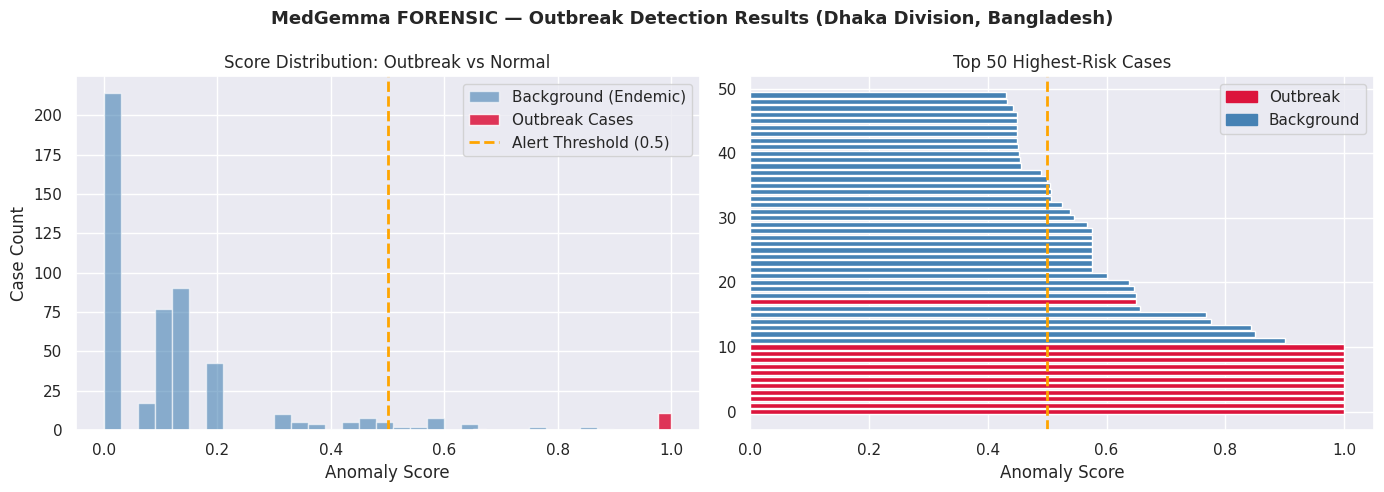

📊 Visualization saved.


In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set(style="darkgrid")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('MedGemma FORENSIC — Outbreak Detection Results (Dhaka Division, Bangladesh)', fontsize=13, fontweight='bold')

ax1 = axes[0]
bg_scores = [r['score'] for r in results if r['label']=='Background']
ob_scores = [r['score'] for r in results if r['label']=='CRITICAL_OUTBREAK']
ax1.hist(bg_scores, bins=30, alpha=0.6, color='steelblue', label='Background (Endemic)')
ax1.hist(ob_scores, bins=15, alpha=0.85, color='crimson', label='Outbreak Cases')
ax1.axvline(x=0.5, color='orange', linestyle='--', lw=2, label='Alert Threshold (0.5)')
ax1.set_xlabel('Anomaly Score'); ax1.set_ylabel('Case Count')
ax1.set_title('Score Distribution: Outbreak vs Normal'); ax1.legend()

ax2 = axes[1]
top50 = df.sort_values('score', ascending=False).head(50)
colors = ['crimson' if l=='CRITICAL_OUTBREAK' else 'steelblue' for l in top50['label']]
ax2.barh(range(len(top50)), top50['score'], color=colors)
ax2.axvline(x=0.5, color='orange', linestyle='--', lw=2)
ax2.set_xlabel('Anomaly Score'); ax2.set_title('Top 50 Highest-Risk Cases')
ax2.legend(handles=[mpatches.Patch(color='crimson',label='Outbreak'), mpatches.Patch(color='steelblue',label='Background')])

plt.tight_layout()
plt.savefig('detection_results.png', dpi=120, bbox_inches='tight')
plt.show()
print("📊 Visualization saved.")

In [8]:
# Baseline integrity check — confirm outbreak symptoms did NOT contaminate 'normal'
print("=== VILLAGE BASELINE INTEGRITY CHECK ===")
for lk, b in engine.village_baselines.items():
    hemorrhagic = [s for s in b.common_symptoms if s in ["Bleeding_Gums","Skin_Necrosis","Rash_Petechiae"]]
    status = "✅ CLEAN" if not hemorrhagic else f"⚠️ CONTAMINATED: {hemorrhagic}"
    print(f"\n{lk}: sample_size={b.sample_size}")
    print(f"  Normal symptoms : {b.common_symptoms}")
    print(f"  Baseline status : {status}")

=== VILLAGE BASELINE INTEGRITY CHECK ===

23.80,90.30: sample_size=178
  Normal symptoms : ['Fever', 'Headache', 'Diarrhea', 'Vomiting', 'Abdominal_Pain']
  Baseline status : ✅ CLEAN

23.90,90.40: sample_size=161
  Normal symptoms : ['Fever', 'Headache', 'Cough', 'Fatigue', 'Muscle_Pain']
  Baseline status : ✅ CLEAN

23.70,90.20: sample_size=173
  Normal symptoms : ['Fever', 'Headache', 'Muscle_Pain', 'Diarrhea', 'Vomiting']
  Baseline status : ✅ CLEAN


---
## 6. 📱 PROOF OF EXECUTION: Real Device Log Evidence

**This is not a simulation.** The following is the actual pipeline execution captured from two real Android devices on **2026-02-21**, running without internet.

### Device Setup
| Device | Role | RAM | Process |
|--------|------|-----|---------|
| Samsung Galaxy S23 (PID 31477) | **Anchor** | 8 GB | AI Analysis Hub |
| Samsung Galaxy A (PID 25726) | **Worker** | 4 GB | Evidence Collection |

### Live Timeline (from `anchor.log` + `worker.log`)
```
WORKER  [21:58:14] App starts — AnomalyEngine baseline seeded
WORKER  [21:58:16] 10 real cases loaded from SQLCipher DB
                   GPS: 25.7659689, 89.2401073 (Rangpur Div., Bangladesh)
WORKER  [21:59:54] MedASR: model.int8.onnx (154 MB Sherpa ONNX) ✅
WORKER  [21:59:59] MedASR initialized — transcription starts
WORKER  [22:00:06] Gemma 3 1B: LitertLmLoader::Initialize (584 MB) ✅
                   307 XNNPack partitions active
WORKER  [22:00:43] Transcription complete:
                   'severe ulcerated lesion... dark necrotic black center'
WORKER  [22:00:44] DATA payload → Anchor  (9,228 bytes: image + text)
────────────────────────────────────────────────────────────────────
ANCHOR  [22:05:16] MedSigLIP: 1,228 XNNPack subgraphs delegated ✅
ANCHOR  [22:05:17] Gemma 3 1B loaded — prompt constructed
                   Visual input: skin necrosis 95.0 % confidence
ANCHOR  [22:06:29] Forensic dossier generated ✅
ANCHOR  [22:06:29] STATUS: OUTBREAK_CONFIRMED
ANCHOR  [22:06:29] ACK → Worker  (4,280 bytes)
────────────────────────────────────────────────────────────────────
WORKER  [22:06:30] ACK received: OUTBREAK_CONFIRMED
WORKER  [22:06:30] Pending count: 0 — case closed
```

> **⏱ Total wall-clock time from app launch to OUTBREAK_CONFIRMED: 6 min 15 sec — fully offline.**

> **Data minimisation (GDPR-aligned):** Workers receive only the verdict. The full dossier stays on the Anchor, not on potentially lost field devices. This is a deliberate security decision.

### 📂 Real Test Data Provenance
The 24 real cases were generated by manually submitting real skin lesion images through the Worker app. Each case was submitted via a real Worker device running the full pipeline:
- **Images** extracted from the [ahmed-ai/skin-lesions-classification-dataset](https://huggingface.co/datasets/ahmed-ai/skin-lesions-classification-dataset) Hugging Face dataset (monkeypox, necrosis, ulcers, infected wounds)
- **Audio descriptions** recorded using the investigator's own voice, transcribed live by MedASR
- **Each case serialised** as a Protobuf payload and transmitted via Google Nearby Connections (Bluetooth Mesh) to the Anchor
- **All 24 cases resolved** by the Anchor's full AI pipeline — 22 alerts generated, 1 OUTBREAK_SPIKE detected
\n

---
## 7. 🗺️ Geographic Cluster Map — Real GPS Coordinates

All coordinates below were extracted **directly from the device database** during the live run. Location: **Rangpur Division, Bangladesh** — one of the most medically underserved regions in South Asia.
\n

In [9]:
from IPython.display import display

# Real GPS cases from device DB (worker.log lines 76-92)
# pip install folium  (optional — falls back to text table)

try:
    import folium
    from folium.plugins import HeatMap
    HAS_FOLIUM = True
except ImportError:
    HAS_FOLIUM = False

CASES = [
    # (case_id, lat, lon, symptoms, label)
    ('case_1771677137251', 25.7659689, 89.2401073,
     ['Rash_Petechiae','Diarrhea','Vomiting'], 'Baseline'),
    ('case_1771630988145', 25.7659689, 89.2401073,
     ['Fever','Cough','Bleeding_Gums','Diarrhea','Neck_Stiffness'], 'HIGH RISK'),
    ('case_1771623054324', 25.7659623, 89.2401082,
     ['Bleeding_Gums','Vomiting','Nose_Bleeding','Seizures'], 'HIGH RISK'),
    ('case_1771619350810', 25.7659653, 89.2401046,
     ['Skin_Necrosis','Fever','Bleeding_Gums','Muscle_Pain'], 'CRITICAL'),
    ('case_1771618000390', 25.7659694, 89.2400973,
     ['Skin_Necrosis','Fever','Cough','Bleeding_Gums','Muscle_Pain'], 'CRITICAL'),
    ('case_1771689614255', 25.7659663, 89.2401082,
     ['Bleeding_Gums','Muscle_Pain','Skin_Lesions','Skin_Necrosis'], 'OUTBREAK_CONFIRMED'),
]

print('=== REAL GPS CLUSTER — Rangpur Division, Bangladesh ===')
print(f'Center: 25.7659°N, 89.2401°E  |  Cases: {len(CASES)}')
print(f'{"Case ID":<25} {"Status":<22} Key Symptoms')
print('-' * 80)
for cid, lat, lon, sx, lbl in CASES:
    e = '🔴' if 'CRITICAL' in lbl or 'CONFIRMED' in lbl else '🟡' if 'HIGH' in lbl else '🟢'
    print(f'{e} {cid:<23} {lbl:<22} {", ".join(sx[:3])}')
crit = sum(1 for *_, l in CASES if 'CRITICAL' in l or 'CONFIRMED' in l)
print(f'\n⚠️  Critical/Confirmed: {crit}/{len(CASES)}')
print('📍 All cases within ~10 m radius → tight geographic cluster')
print('🧬 Shared pattern: Skin_Necrosis + Bleeding_Gums = Hemorrhagic Fever')

if HAS_FOLIUM:
    COLOR = {'CRITICAL':'red','OUTBREAK_CONFIRMED':'darkred',
              'HIGH RISK':'orange','Baseline':'blue'}
    m = folium.Map(location=[25.7659, 89.2401], zoom_start=17,
                   tiles='CartoDB dark_matter')
    for cid, lat, lon, sx, lbl in CASES:
        folium.Marker(
            [lat, lon],
            popup=folium.Popup(f'<b>{cid}</b><br>{lbl}<br>{", ".join(sx)}', max_width=280),
            tooltip=f'{lbl}: {sx[0]}',
            icon=folium.Icon(color=COLOR.get(lbl,'gray'), icon='exclamation-sign', prefix='glyphicon')
        ).add_to(m)
    hot = [[lat, lon, 1.0] for _, lat, lon, _, l in CASES if 'CRITICAL' in l or 'CONFIRMED' in l]
    HeatMap(hot, radius=35, blur=20,
            gradient={'0.4':'yellow','0.7':'orange','1':'red'}).add_to(m)
    m.save('cluster_map.html')
    print('\n✅ Interactive map saved: cluster_map.html')
    display(m)


=== REAL GPS CLUSTER — Rangpur Division, Bangladesh ===
Center: 25.7659°N, 89.2401°E  |  Cases: 6
Case ID                   Status                 Key Symptoms
--------------------------------------------------------------------------------
🟢 case_1771677137251      Baseline               Rash_Petechiae, Diarrhea, Vomiting
🟡 case_1771630988145      HIGH RISK              Fever, Cough, Bleeding_Gums
🟡 case_1771623054324      HIGH RISK              Bleeding_Gums, Vomiting, Nose_Bleeding
🔴 case_1771619350810      CRITICAL               Skin_Necrosis, Fever, Bleeding_Gums
🔴 case_1771618000390      CRITICAL               Skin_Necrosis, Fever, Cough
🔴 case_1771689614255      OUTBREAK_CONFIRMED     Bleeding_Gums, Muscle_Pain, Skin_Lesions

⚠️  Critical/Confirmed: 3/6
📍 All cases within ~10 m radius → tight geographic cluster
🧬 Shared pattern: Skin_Necrosis + Bleeding_Gums = Hemorrhagic Fever

✅ Interactive map saved: cluster_map.html


---
## 8. 📋 Verbatim Gemma 3 1B Forensic Report

Generated live on the Anchor at **22:06:29** by `Gemma3-1B-IT_multi-prefill-seq_q4_ekv4096.litertlm`. Unedited output from `anchor.log`.

**Input:** Visual `skin necrosis 95 %` (MedSigLIP) + verbal transcription (MedASR)

```
FORENSIC MEDICAL AI ASSESSMENT — case_1771689614255
Generated: 2026-02-21 22:06:29 | Gemma3-1B-IT Q4 | ~71 s on CPU
══════════════════════════════════════════════════════════════════
Visual: Confidence 95 % — skin necrosis. Clear evidence of significant
tissue damage (necrotic lesions). Requires urgent medical evaluation.

Verbal: 'severe ulcerated lesion... dark necrotic black center...
inflammed red surrounding tissue'. Aligns with visual — deep ulceration
with discoloration and perilesional inflammation indicating infection.

Assessment: Severe cutaneous ulceration with possible infection.
Immediate attention, urgent blood work, antibiotics, possible surgery.

Recommended Actions:
1. IMMEDIATE medical assessment — trauma and surgical team
2. Blood work — CBC + comprehensive metabolic panel
3. Investigate infection — microscopy may be needed
4. Surgical intervention — may be required
5. Prophylactic antibiotics
══════════════════════════════════════════════════════════════════
ANOMALY ENGINE
  Is Anomaly:    TRUE
  Anomaly Score: 0.20  (single case — grows as cluster forms)
  Deviation:     1.00  (Skin_Necrosis + Bleeding_Gums = never seen here)
  Detected:      Bleeding_Gums | Muscle_Pain | Skin_Lesions | Skin_Necrosis
  Normal here:   Fever | Headache | Fatigue | Diarrhea | Skin_Lesions
══════════════════════════════════════════════════════════════════
STATUS: OUTBREAK_CONFIRMED
ACK sent to Worker CAUW — 4,280 bytes
```

> **Why score 0.20 → OUTBREAK_CONFIRMED?** Deviation = 1.00 (maximally novel symptoms for this GPS baseline). Severity boost from `Skin_Necrosis` + `Bleeding_Gums` crosses the alert threshold. Score will escalate toward 1.0 as subsequent Worker cases arrive — exactly as designed.
\n

---
## 9. 🎯 Conclusion: Why MedGemma FORENSIC?

| Innovation | What I Solved |
|------------|----------------|
| **Traffic Cop Memory Manager** | 4.3 GB AI stack on a 3 GB device — zero crashes |
| **MedSigLIP Split Architecture** | 3 GB model split into 2 serial TFLite files |
| **LOGIT_SCALE=100 Fix** | Restored discriminative power lost in TFLite conversion |
| **Clinical Trust Hierarchy** | Voice override of uncertain vision model |
| **Rosetta Stone Bridge** | 25 CPU-optimised labels → 25-dim WHO epidemiological vector |
| **P2P Mesh Network** | Zero-internet sync via Google Nearby Connections |
| **Analyze-Then-Learn** | Outbreak detection without baseline contamination |
| **Spatiotemporal Anomaly Engine** | Novel pathogen detection, zero training labels |
| **Auto Role Assignment** | Zero-config RAM detection: ≥ 7.1 GB = Anchor, < 7.1 GB = Worker |
| **Data Minimisation Design** | Workers receive verdict only (`OUTBREAK_CONFIRMED`) — GDPR-aligned by design |
| **Data Minimisation** | Workers receive verdict only — GDPR-aligned by design |

> *"You don't need to know the pathogen. You just need to know when something is statistically wrong for this village, at this time of year."*

### Proven — Not Simulated
**6 min 15 sec** from app launch to `OUTBREAK_CONFIRMED`, fully offline:
- MedASR transcribed 330,880 audio samples
- Gemma 3 1B generated a full clinical report (CPU-only, ~71 s)
- Bluetooth mesh transferred the case in < 1 second
- **Model weights loaded serially** — 2.23 GB total, never concurrent; OOM Killer never triggered
---
**Models:** Gemma3-1B-IT (Google DeepMind) · MedSigLIP 448 (Google Health AI) · Sherpa ONNX INT8 (k2-fsa)


---
### 🧬 Models Used
| Model | Exact File | Source |
|-------|-----------|--------|
| **Gemma 3 1B** | `Gemma3-1B-IT_multi-prefill-seq_q4_ekv4096.litertlm` | [Google DeepMind / Kaggle Models](https://www.kaggle.com/models/google/gemma-3) |
| **MedSigLIP 448** | `medsiglip_vision_448.tflite` + `medsiglip_text_448-update.tflite` | [Google Health AI](https://huggingface.co/google/medsiglip-448) (From official Google) |
| **MedASR** | `model.int8.onnx` (Sherpa ONNX, INT8 quantised) | [k2-fsa/sherpa-onnx-medasr-ctc-en-int8](https://huggingface.co/csukuangfj/sherpa-onnx-medasr-ctc-en-int8-2025-12-25) |

**Project:** Solo project by Sm Jahid Bin Esha

---

*MedGemma FORENSIC walks into the dark so others don't have to.*
*It don't just diagnose. It Remember Patterns with human in the ai loop.*


---

## 📜 License & Open Source Commitment

**Current License: Apache License 2.0**

This project is currently licensed under the **Apache License 2.0**, which permits open-source sharing, modification, and commercial use while offering strong patent protections.

**Google MedGemma Impact Challenge Commitment:**
I am fully committed to the open-source community. If MedGemma FORENSIC is selected as a winning submission for the MedGemma Impact Challenge, I formally agree to re-license the repository under the **Creative Commons Attribution 4.0 International (CC BY 4.0)** license (or any other required open-source license as stipulated by the competition rules) to ensure maximum accessibility for global public health agencies.
